<a href="https://colab.research.google.com/github/nealaicinena/CPSC298-Projects/blob/main/CPSC_298_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.linear_model import LinearRegression # Linear Regression Model
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [ ]:
import pandas as pd
from google.colab import files
ml_performance = files.upload()
from google.colab import files
ml_metadata = files.upload()

In [ ]:
df_performance = pd.read_csv("ml_challenge_performance.csv")
df_performance.head()

,creative_id,first_date,last_date,days,imps,clicks
0,21886885,2022-02-18,2022-05-24,77,13709350,12950
1,21668128,2021-12-23,2022-08-01,222,3608280,11590
2,22199278,2022-05-25,2022-08-05,73,10954660,17295
3,21799828,2022-01-13,2022-07-11,179,18940260,27430
4,21852133,2022-02-07,2022-08-05,180,111130,330


In [ ]:
df_metadata = pd.read_csv("ml_challenge_metadata.csv")
df_metadata.head()

,creative_id,advertiser_id,advertiser_industry,advertiser_name,creative_name,creative_image_url,creative_landing_page_url,creative_width,creative_height
0,20574252,43802,Shopping,NEBO,2020 Halloween BOGO,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/p/MYCRO/595?utm_sour...,468,60
1,21818194,78085,Travel,Nassau Paradise Island (Net Conversion),Nassau Paradise Island Q1 2022 - Display Added...,https://media-cdn.ipredictive.com/image/78085/...,https://x.vindicosuite.com/click/?v=5;m=3;l=55...,468,60
2,20514807,43802,Shopping,NEBO,Bright Rechargeable Flashlights,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/?utm_source=ward&utm...,336,280
3,20514862,43802,Shopping,NEBO,Bright Rechargeable Flashlights,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/?utm_source=ward&utm...,970,251
4,20948512,43802,Shopping,NEBO,2021 Flashlight Madness,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/pg/Flashlight-Madnes...,970,251


In [ ]:
df_merge = pd.concat([df_performance, df_metadata], axis=1)
df_merge.head()

,creative_id,first_date,last_date,days,imps,clicks,creative_id,advertiser_id,advertiser_industry,advertiser_name,creative_name,creative_image_url,creative_landing_page_url,creative_width,creative_height
0,21886885,2022-02-18,2022-05-24,77,13709350,12950,20574252,43802,Shopping,NEBO,2020 Halloween BOGO,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/p/MYCRO/595?utm_sour...,468,60
1,21668128,2021-12-23,2022-08-01,222,3608280,11590,21818194,78085,Travel,Nassau Paradise Island (Net Conversion),Nassau Paradise Island Q1 2022 - Display Added...,https://media-cdn.ipredictive.com/image/78085/...,https://x.vindicosuite.com/click/?v=5;m=3;l=55...,468,60
2,22199278,2022-05-25,2022-08-05,73,10954660,17295,20514807,43802,Shopping,NEBO,Bright Rechargeable Flashlights,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/?utm_source=ward&utm...,336,280
3,21799828,2022-01-13,2022-07-11,179,18940260,27430,20514862,43802,Shopping,NEBO,Bright Rechargeable Flashlights,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/?utm_source=ward&utm...,970,251
4,21852133,2022-02-07,2022-08-05,180,111130,330,20948512,43802,Shopping,NEBO,2021 Flashlight Madness,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/pg/Flashlight-Madnes...,970,251


In [ ]:
df_merge["CTR"] = df_merge["clicks"]/df_merge["imps"]
df_merge.head()

,creative_id,first_date,last_date,days,imps,clicks,creative_id,advertiser_id,advertiser_industry,advertiser_name,creative_name,creative_image_url,creative_landing_page_url,creative_width,creative_height,CTR
0,21886885,2022-02-18,2022-05-24,77,13709350,12950,20574252,43802,Shopping,NEBO,2020 Halloween BOGO,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/p/MYCRO/595?utm_sour...,468,60,0.000945
1,21668128,2021-12-23,2022-08-01,222,3608280,11590,21818194,78085,Travel,Nassau Paradise Island (Net Conversion),Nassau Paradise Island Q1 2022 - Display Added...,https://media-cdn.ipredictive.com/image/78085/...,https://x.vindicosuite.com/click/?v=5;m=3;l=55...,468,60,0.003212
2,22199278,2022-05-25,2022-08-05,73,10954660,17295,20514807,43802,Shopping,NEBO,Bright Rechargeable Flashlights,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/?utm_source=ward&utm...,336,280,0.001579
3,21799828,2022-01-13,2022-07-11,179,18940260,27430,20514862,43802,Shopping,NEBO,Bright Rechargeable Flashlights,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/?utm_source=ward&utm...,970,251,0.001448
4,21852133,2022-02-07,2022-08-05,180,111130,330,20948512,43802,Shopping,NEBO,2021 Flashlight Madness,https://media-cdn.ipredictive.com/image/43802/...,https://www.nebotools.com/pg/Flashlight-Madnes...,970,251,0.002969


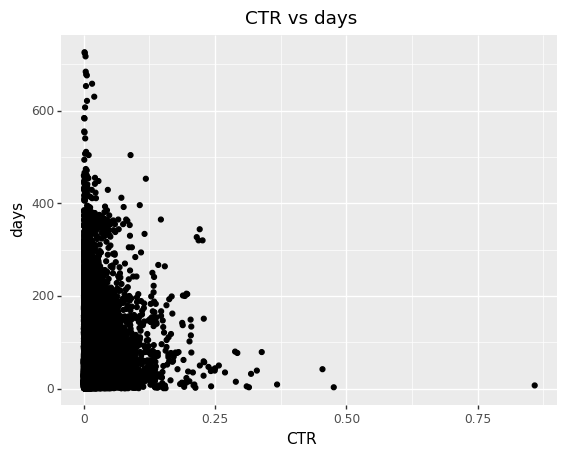

In [ ]:
print((ggplot(df_merge, aes(x = "CTR", y = "days")) + geom_point() + ggtitle("CTR vs days")))

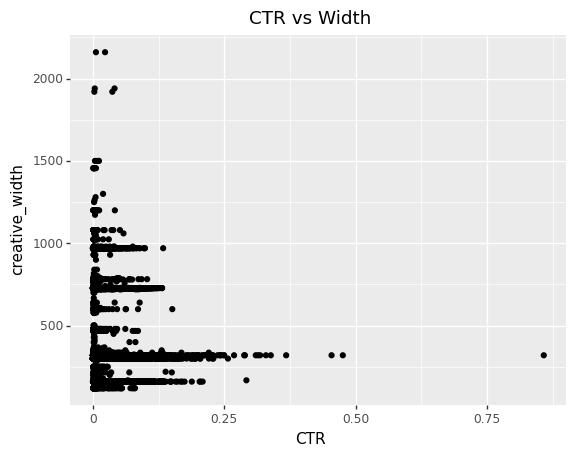

In [ ]:
print((ggplot(df_merge, aes(x = "CTR", y = "creative_width")) + geom_point() + ggtitle("CTR vs Width")))

In [ ]:
features = ["days", "imps", "clicks", "creative_width", "creative_height", "CTR"]
#cont = ["days", "imps", "clicks", "creative_width", "creative_height"]

X = df_merge[features]
y = df_merge["advertiser_industry"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
z = StandardScaler()

z.fit(X_train)
X_train[features] = z.fit_transform(X_train[features])
X_test[features] = z.fit_transform(X_test[features])

#Make logistic regression model
myLog = LogisticRegression()
myLog.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
pred_val = myLog.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names


In [ ]:
print("Accuracy: ", accuracy_score(y_test, pred_val))
print("F1 Score: ", f1_score(y_test, pred_val, pos_label='positive', average='micro'))
print("Recall: ", recall_score(y_test, pred_val, pos_label='positive', average='micro'))
print("Precision: ", precision_score(y_test, pred_val, pos_label='positive', average='micro'))

Accuracy:  0.27285191956124316
F1 Score:  0.27285191956124316


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.


Recall:  0.27285191956124316
Precision:  0.27285191956124316


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.


In [ ]:
#making a binary tree
X = df_merge[["days", "imps", "clicks", "creative_width", "creative_height", "CTR"]]
y = df_merge["advertiser_industry"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

z.fit(X_train)

X_train = z.transform(X_train)
X_test = z.transform(X_test)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#metrics
print("Train Acc: ", accuracy_score(y_train, tree.predict(X_train)))
print("Test Acc: ", accuracy_score(y_test, tree.predict(X_test)))

print("TRAIN Precision: ", precision_score(y_train, tree.predict(X_train), pos_label='positive', average='micro'))
print("TEST Precision: ", precision_score(y_test, tree.predict(X_test), pos_label='positive', average='micro'))


print("TRAIN Recall: ", recall_score(y_train, tree.predict(X_train), pos_label='positive', average='micro'))
print("TEST Recall : ", recall_score(y_test, tree.predict(X_test), pos_label='positive', average='micro'))

print("TRAIN f1: ", f1_score(y_train, tree.predict(X_train), pos_label='positive', average='micro'))
print("TEST f1 : ", f1_score(y_test, tree.predict(X_test), pos_label='positive', average='micro'))

Train Acc:  0.9943504259397972
Test Acc:  0.3556774324598822


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.


TRAIN Precision:  0.9943504259397972
TEST Precision:  0.3556774324598822


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.


TRAIN Recall:  0.9943504259397972
TEST Recall :  0.3556774324598822


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.


TRAIN f1:  0.9943504259397972
TEST f1 :  0.35567743245988226


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
